In [1]:
from modules.binary_classifier import BinaryClassifier, BinaryClassifierNoQuantization
from modules.ternary_classifier import TernaryClassifier
import numpy as np
import matplotlib.pyplot as plt

Valores medios: 0.75


(-0.5, 99.5, 99.5, -0.5)

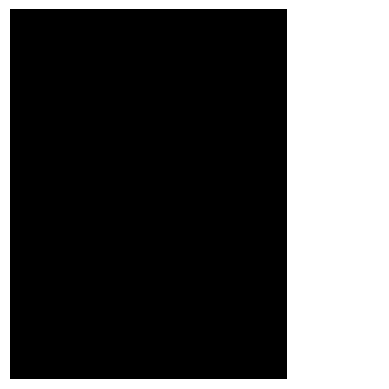

In [2]:
y0 = np.zeros((100, 100), dtype=int)
for i in range(100):
    for j in range(100):
        if j < 75:
            y0[i, j] = 1
        else:
            y0[i, j] = 0

valores = np.mean(y0)
print(f"Valores medios: {valores}")
plt.imshow(y0, cmap='binary')
plt.axis('off')

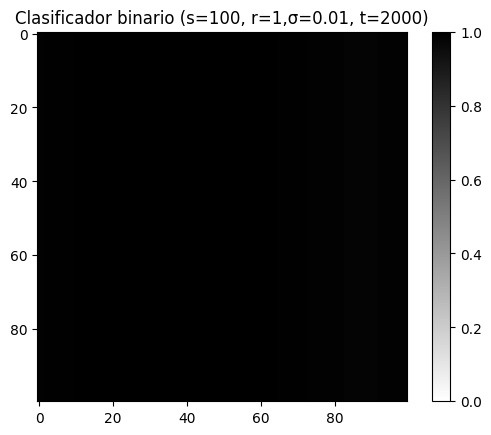

In [10]:
cnq = BinaryClassifierNoQuantization(y0, 1e-2, 100, 1)
for _ in range(2000):
    cnq.step()
cnq.show()

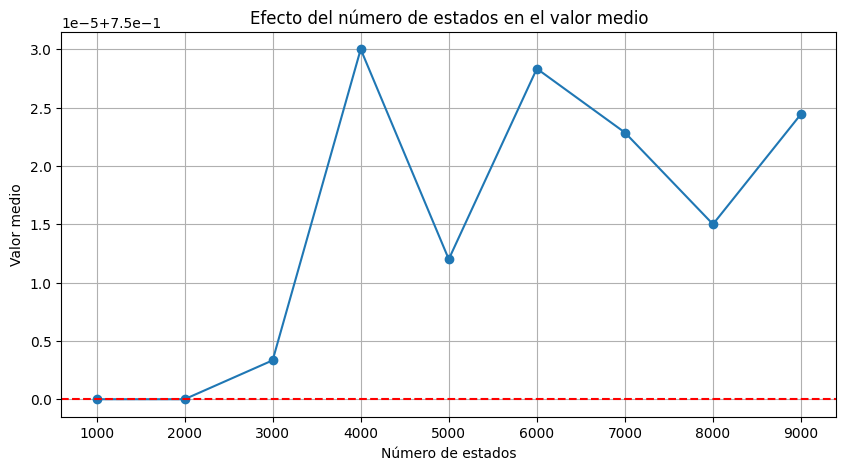

In [13]:
state_numbers = np.arange(1000, 10000, 1000)
means = []
for s in state_numbers:
    c = BinaryClassifier(y0, 1e-2, s, 1)
    for _ in range(50):
        c.step()
    means.append(np.mean(c.grid))

plt.figure(figsize=(10, 5))
plt.plot(state_numbers, means, marker='o')
plt.axhline(y=0.75, color='r', linestyle='--', label='Valor medio objetivo')
plt.xlabel('Número de estados')
plt.ylabel('Valor medio')
plt.title('Efecto del número de estados en el valor medio')
plt.grid()

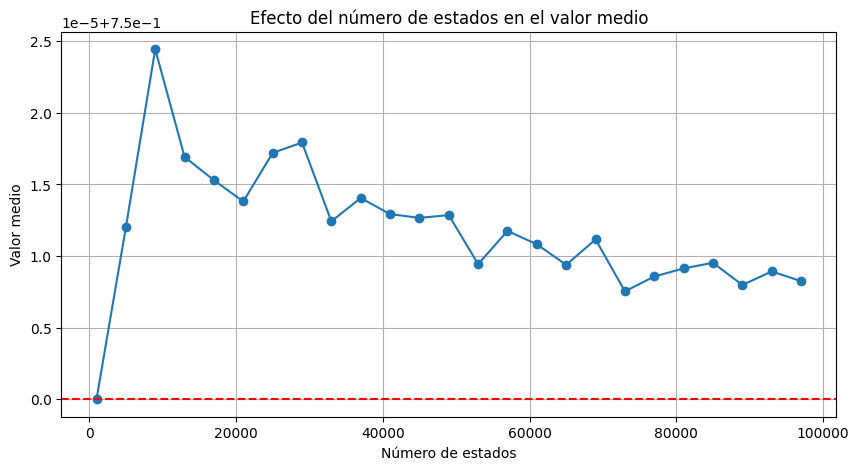

In [15]:
state_numbers = np.arange(1000, 100000, 4000)
means = []
for s in state_numbers:
    c = BinaryClassifier(y0, 1e-2, s, 1)
    for _ in range(50):
        c.step()
    means.append(np.mean(c.grid))

plt.figure(figsize=(10, 5))
plt.plot(state_numbers, means, marker='o')
plt.axhline(y=0.75, color='r', linestyle='--', label='Valor medio objetivo')
plt.xlabel('Número de estados')
plt.ylabel('Valor medio')
plt.title('Efecto del número de estados en el valor medio')
plt.grid()

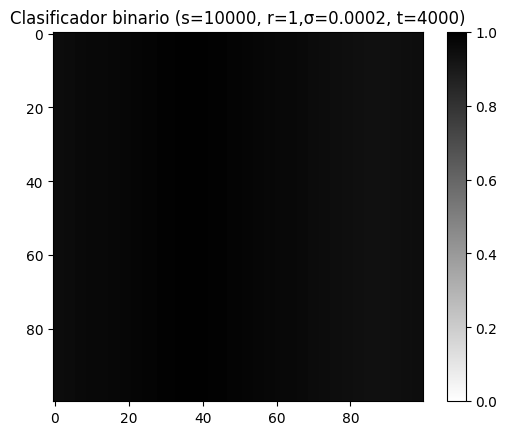

In [22]:
# c = BinaryClassifier(y0, 2e-4, 10000, 1)
for _ in range(2000):
    c.step()
c.show()

# Figura 4 paper

In [ ]:
np.random.seed(32)
sigmas = np.logspace(-4, -1, 30)
wr = []
for sigma in sigmas:
    n = 1000
    w = 0
    for i in range(n):
        y0 = np.random.randint(0, 2, size=249)
        cl = BinaryClassifier(y0, sigma, 10, 3)
        for j in range(int(2e8)):
            cl.step()
            if cl.convergence() or cl.convergence_to_constant():
                break
        target = np.round(np.mean(y0))
        pred = np.round(np.mean(cl.grid))
        if target == pred:
            w += 1
    wr.append(w / n)

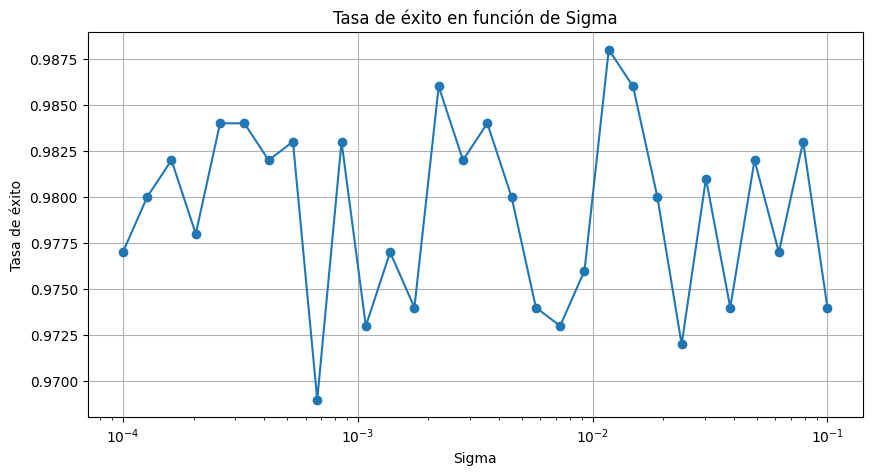

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(sigmas, wr, marker='o')
plt.xscale('log')
plt.xlabel('Sigma')
plt.ylabel('Tasa de éxito')
plt.title('Tasa de éxito en función de Sigma')
plt.grid()

In [14]:
np.random.seed(32)
sigmas = np.logspace(-4, -1, 10)
wr = []
for sigma in sigmas:
    n = 1000
    w = 0
    for i in range(n):
        y0 = np.random.randint(0, 2, size=1001)
        cl = BinaryClassifier(y0, sigma, 100, 3)
        for j in range(int(2e8)):
            cl.step()
            if cl.convergence() or cl.convergence_to_constant():
                break
        target = np.round(np.mean(y0))
        pred = np.round(np.mean(cl.grid))
        if target == pred:
            w += 1
    wr.append(w / n)

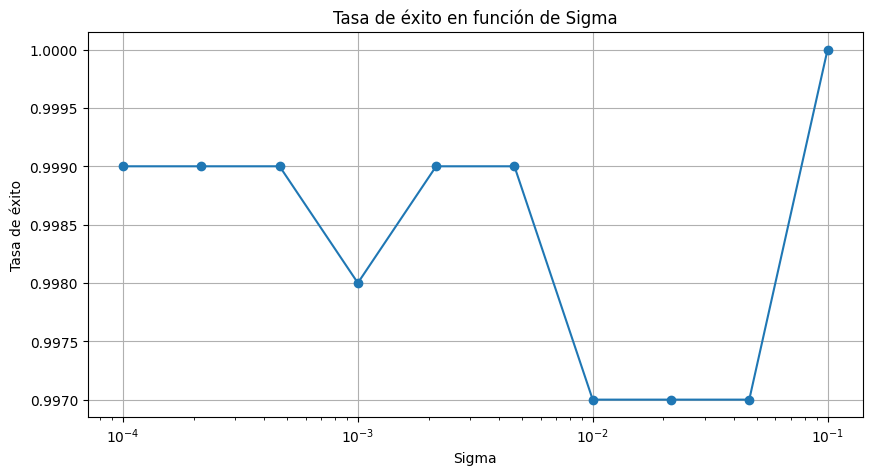

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(sigmas, wr, marker='o')
plt.xscale('log')
plt.xlabel('Sigma')
plt.ylabel('Tasa de éxito')
plt.title('Tasa de éxito en función de Sigma')
plt.grid()

# Figura 6 paper

In [25]:
np.random.seed(32)
sigma =7e-3
wr = []
emes = np.arange(75, 86, 1)
for m in emes:
    base = np.array(m*[1] + (149-m)*[0])
    n = 1000
    w = 0
    for i in range(n):
        y0 = np.random.permutation(base)
        cl = BinaryClassifier(y0, sigma, 30, 3)
        for j in range(int(2e8)):
            cl.step()
            if cl.convergence() or cl.convergence_to_constant():
                break
        target = np.round(np.mean(y0))
        pred = np.round(np.mean(cl.grid))
        if target == pred:
            w += 1
    wr.append(w / n)

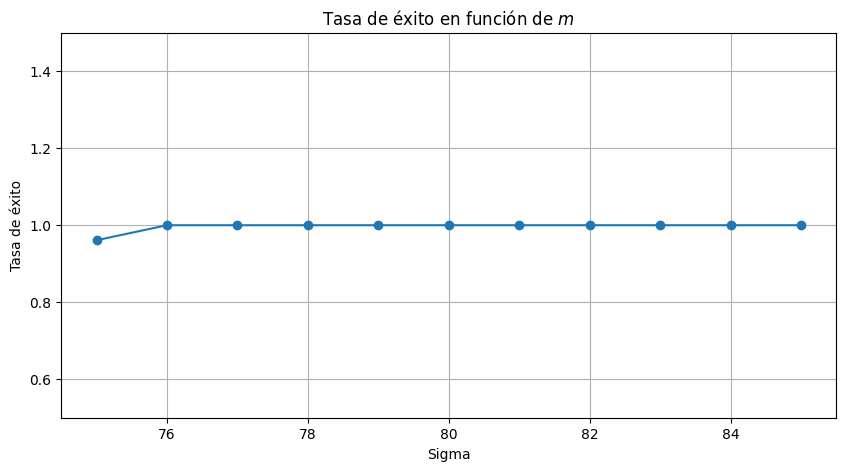

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(emes, wr, marker='o')
plt.ylim(0.5, 1.5)
plt.xlabel('Sigma')
plt.ylabel('Tasa de éxito')
plt.title('Tasa de éxito en función de $m$')
plt.grid()

# Figuras del final

In [ ]:
30**2

432.99

(-0.5, 29.5, 29.5, -0.5)

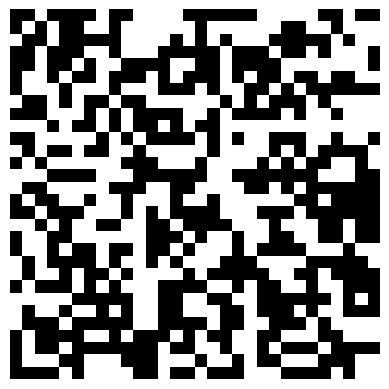

In [9]:
size = (30, 30)
m = 900 - 433
base = np.array(m*[1] + (size[0]*size[1]-m)*[0])
np.random.seed(32)
y0 = np.random.permutation(base).reshape(size)
plt.imshow(y0, cmap='binary')
plt.axis('off')

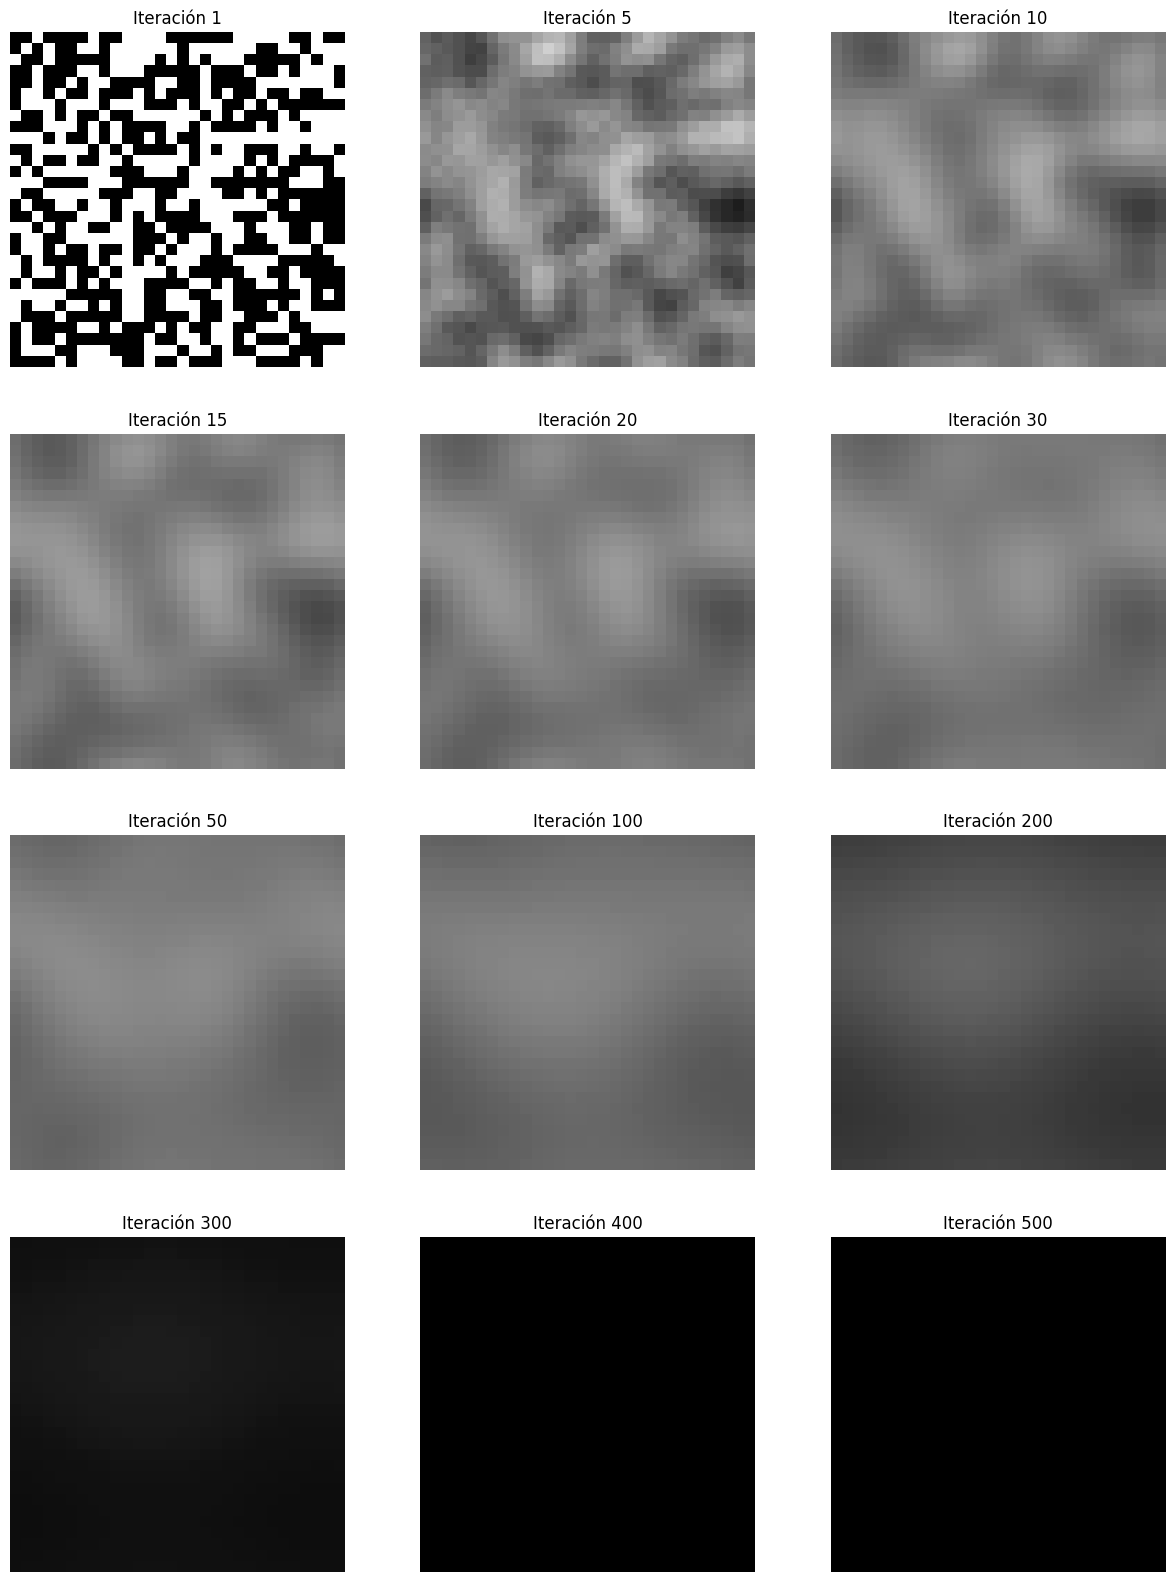

In [11]:
sigma = 5e-2
s = 1e4
i_show = {0, 4, 9, 14, 19, 29, 49, 99, 199, 299, 399, 499}
fig, axs = plt.subplots(4, 3, figsize=(15, 20))
cl = BinaryClassifier(y0, sigma, s, 1)
j = 0
for i in range(500):
    if i in i_show:
        ax = axs[j // 3, j % 3]
        cl.show(ax=ax)
        ax.set_title(f"Iteración {i+1}")
        ax.axis('off')
        if ax.images:
            for im in ax.get_images():
                if im.colorbar:
                    im.colorbar.remove()
        j += 1
    cl.step()

(-0.5, 29.5, 29.5, -0.5)

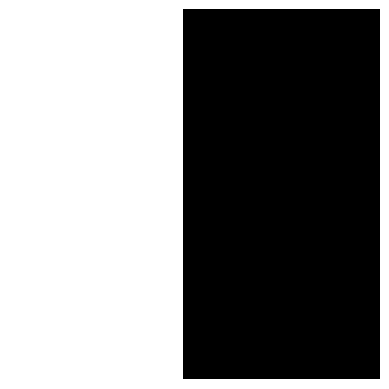

In [17]:
row = np.array(14*[0] + 16*[1])
y1 = np.tile(row, (30, 1))
plt.imshow(y1, cmap='binary')
plt.axis('off')

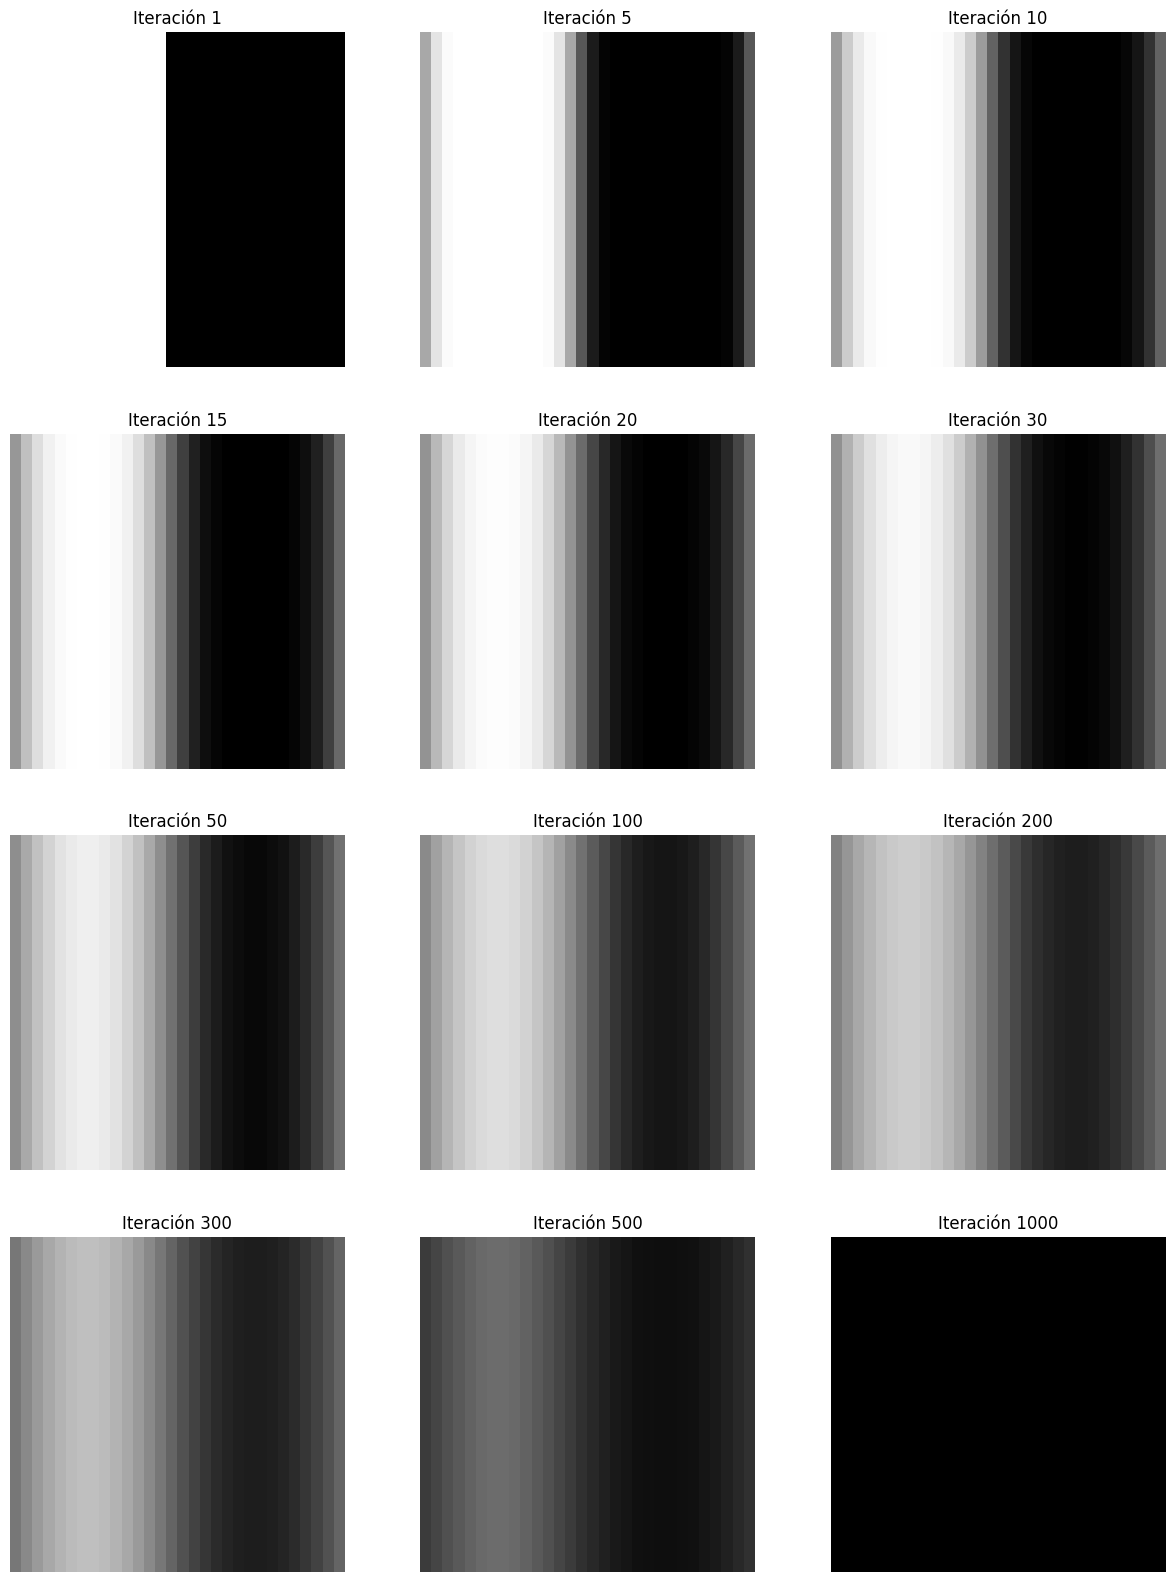

In [20]:
i_show = {0, 4, 9, 14, 19, 29, 49, 99, 199, 299, 499, 999}
fig, axs = plt.subplots(4, 3, figsize=(15, 20))
cl = BinaryClassifier(y1, sigma, s, 1)
j = 0
for i in range(1000):
    if i in i_show:
        ax = axs[j // 3, j % 3]
        cl.show(ax=ax)
        ax.set_title(f"Iteración {i+1}")
        ax.axis('off')
        if ax.images:
            for im in ax.get_images():
                if im.colorbar:
                    im.colorbar.remove()
        j += 1
    cl.step()